In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from matplotlib.collections import LineCollection
#z, y, x순서임.

#근데 speed[0]은 x벡터의 크기, speed[1]은 y벡터의 크, speed[2]는 z벡터의 크기 됨 주의.
RESOLUTION = 297, 210

target_name = "3d.pt"

In [2]:
def get_drawing_polylines(polylines):
    
    drawing_polylines = []
    res_tensor = torch.tensor(RESOLUTION[::-1])  # (W,H) → 텐서로 변환
    for poly in polylines:
        polyline = []
        prev_div = None  # 이전 점이 속한 cell 기록
        
        for point in poly:
            point = point.cpu()
            
            # (x,y) 좌표 → 어떤 cell인지 계산
            div = (point // res_tensor).tolist()
            
            # polyline이 끊어져야 하는 경우
            if prev_div is not None and div != prev_div:
                if polyline:  # 지금까지 모인 점 저장
                    drawing_polylines.append(polyline)
                polyline = []
            
            # 현재 cell 내부 좌표 (잔여 좌표)
            local_point = (point % res_tensor).tolist()
            polyline.append(local_point)
            
            prev_div = div
        
        if polyline:  # 마지막 잔여 선분 처리
            drawing_polylines.append(polyline)
    return drawing_polylines

In [3]:
polylines = torch.load(target_name, weights_only=False)

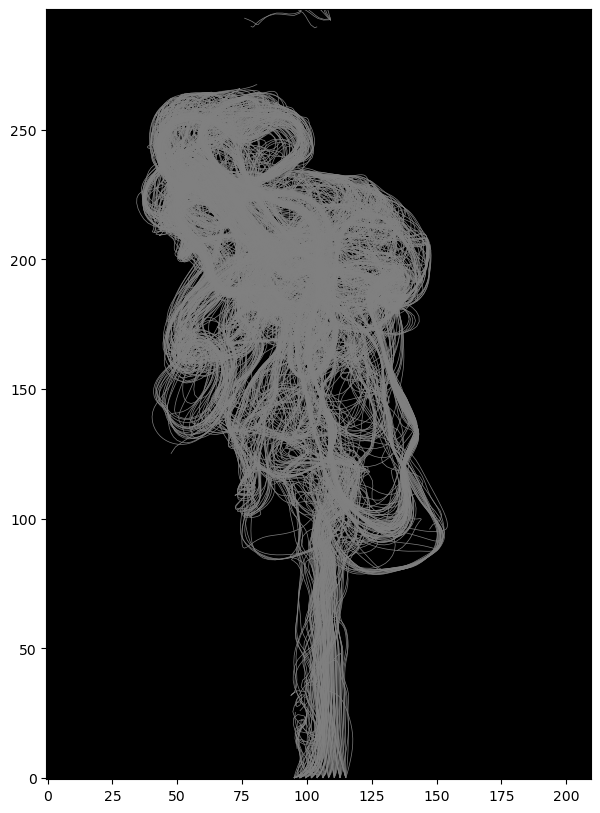

In [4]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np

fig, ax = plt.subplots(figsize=(20, 10))  # 한 그림만
im = ax.imshow(np.zeros(RESOLUTION), cmap='gray', vmin=0, vmax=1, origin="lower")

line_segments = LineCollection([], colors='gray', linewidths=0.5)
ax.add_collection(line_segments)

if(polylines.shape[-1] == 3):
    drawing_polylines = get_drawing_polylines(polylines[:, :, [0, 2]])
else:
    drawing_polylines = get_drawing_polylines(polylines)
line_segments.set_segments(drawing_polylines)

plt.show()  # 여기서 그림을 띄움
